In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, make_scorer

import matplotlib.pyplot as plt
import joblib

In [ ]:
def drop_columns(df):
    """
    Drops the specified columns from the DataFrame and returns the resulting DataFrame.
    Also prints the first few rows of the resulting DataFrame.
    
    Parameters:
    df (pd.DataFrame): The input DataFrame.
    
    Returns:
    pd.DataFrame: The DataFrame after dropping the specified columns.
    """
    columns_to_drop = ['espessura', 'Index','Cluster','cluster']
    df = df.drop(columns=columns_to_drop, inplace=True)
    return df

In [18]:
# Step 1: Load the Excel file
file_path = 'df1.xlsx'
data = pd.read_excel(file_path)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 473 entries, 0 to 472
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Index               0 non-null      float64
 1   peso                473 non-null    float64
 2   comprimento_Total   473 non-null    float64
 3   comprimento_Padrao  473 non-null    float64
 4   comprimento_Cabeça  473 non-null    float64
 5   altura              473 non-null    float64
 6   espessura           473 non-null    float64
 7   Cluster             473 non-null    int64  
 8   cluster             473 non-null    int64  
dtypes: float64(7), int64(2)
memory usage: 33.4 KB


In [19]:
drop_columns(data)
data

,peso,comprimento_Total,comprimento_Padrao,comprimento_Cabeça,altura,Cluster,cluster
0,254.91,23.40,20.2,5.5,7.1,1,1
1,310.24,23.00,19.9,6.3,7.7,1,1
2,314.15,23.40,19.8,6.4,7.1,1,1
3,251.68,22.80,19.4,6.2,7.3,1,1
4,290.01,23.04,19.6,6.4,7.4,1,1
...,...,...,...,...,...,...,...
468,822.67,36.00,30.6,9.0,10.6,1,1
469,653.60,32.00,26.7,9.0,10.9,1,1
470,905.54,35.20,28.8,9.6,9.1,1,1
471,754.89,33.30,29.4,9.5,10.0,1,1


In [20]:
# Step 1: Load the Excel file
file_path = 'df1.xlsx'
data = pd.read_excel(file_path)

# Step 2: Define features (X) and target (y)
# Assuming the target column is named 'peso' (replace if needed)
X = data.drop(columns=['peso'])
y = data['peso']

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Set up a grid of hyperparameters to search over for Extra Trees Regressor
param_grid = {
    'n_estimators': [100, 200, 300],       # Number of trees
    'max_depth': [None, 10, 20, 30],       # Maximum depth of trees
    'min_samples_split': [2, 5, 10],       # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4],         # Minimum samples required at a leaf node
    'max_features': ['auto', 'sqrt', 'log2']  # Number of features to consider for splits
}

# Step 5: Define scoring metrics
scoring = {
    'neg_mean_squared_error': 'neg_mean_squared_error',
    'r2': make_scorer(r2_score)
}

# Step 6: Initialize Extra Trees Regressor and GridSearchCV
extra_trees_regressor = ExtraTreesRegressor(random_state=42)
grid_search = GridSearchCV(
    estimator=extra_trees_regressor,
    param_grid=param_grid,
    scoring=scoring,
    refit='r2',  # This will select the best model based on R2 score
    cv=5,  # 5-fold cross-validation
    n_jobs=-1
)

# Step 7: Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Step 8: Get the best parameters and the best score
best_params = grid_search.best_params_
best_r2_score = grid_search.best_score_

# Step 9: Test the model on the test data and calculate final performance
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
test_mse = mean_squared_error(y_test, y_pred)
test_r2 = r2_score(y_test, y_pred)

print("Best Parameters:", best_params)
print("Best Cross-Validation R2 Score:", best_r2_score)
print("Test Mean Squared Error:", test_mse)
print("Test R2 Score:", test_r2)

ValueError: 
All the 1620 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
311 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\crist\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\crist\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\crist\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\crist\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\_param_validation.py", line 95, in validate_parameter_constraints
    raise InvalidParameterError(
sklearn.utils._param_validation.InvalidParameterError: The 'max_features' parameter of ExtraTreesRegressor must be an int in the range [1, inf), a float in the range (0.0, 1.0], a str among {'sqrt', 'log2'} or None. Got 'auto' instead.

--------------------------------------------------------------------------------
229 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\crist\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\crist\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\crist\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\crist\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\_param_validation.py", line 95, in validate_parameter_constraints
    raise InvalidParameterError(
sklearn.utils._param_validation.InvalidParameterError: The 'max_features' parameter of ExtraTreesRegressor must be an int in the range [1, inf), a float in the range (0.0, 1.0], a str among {'log2', 'sqrt'} or None. Got 'auto' instead.

--------------------------------------------------------------------------------
1080 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\crist\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\crist\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "C:\Users\crist\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_forest.py", line 377, in fit
    estimator._compute_missing_values_in_feature_mask(
  File "C:\Users\crist\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\tree\_classes.py", line 214, in _compute_missing_values_in_feature_mask
    assert_all_finite(X, **common_kwargs)
  File "C:\Users\crist\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py", line 216, in assert_all_finite
    _assert_all_finite(
  File "C:\Users\crist\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py", line 126, in _assert_all_finite
    _assert_all_finite_element_wise(
  File "C:\Users\crist\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py", line 175, in _assert_all_finite_element_wise
    raise ValueError(msg_err)
ValueError: Input X contains NaN.
ExtraTreesRegressor does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values


In [16]:
# Step 1: Load the data
file_path = 'df1.xlsx'
data = pd.read_excel(file_path)

In [17]:
# Step 2: Select features and target
X = data.drop(columns=['peso'])
y = data['peso']


In [18]:
# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)


In [19]:
# Step 4: Initialize the Extra Trees Regressor
#etr = RandomForestClassifier(random_state=42)
etr = GradientBoostingRegressor(random_state=42)

In [20]:
# Step 5: Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [21]:
# Step 6: Perform Grid Search with Cross-Validation
grid_search = GridSearchCV(estimator=etr, param_grid=param_grid, cv=5, n_jobs=-1, scoring='r2')
grid_search.fit(X_train, y_train)

C:\Users\crist\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
540 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
356 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\crist\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\crist\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='r2')

In [22]:
# Step 7: Best parameters and model evaluation
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Parameters:", best_params)

Best Parameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 50}


In [23]:
# Predict and evaluate the model
y_pred = best_model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("R² Score:", r2)

R² Score: 0.9872190590501144


In [24]:
# Step 8: Plot learning curves
def plot_learning_curve(estimator, title, X, y, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

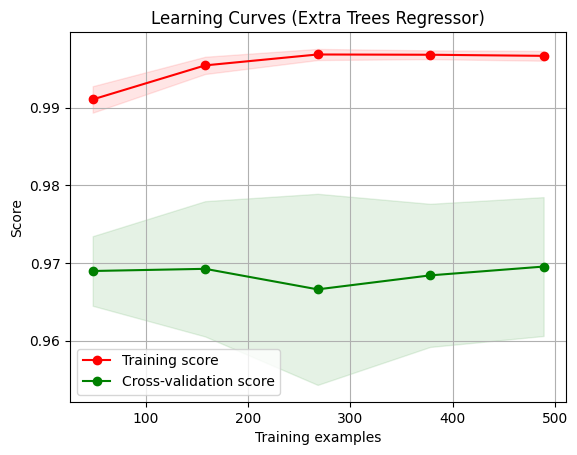

In [25]:
plot_learning_curve(best_model, "Learning Curves (Extra Trees Regressor)", X_train, y_train, cv=5, n_jobs=-1)
plt.show()

In [26]:
# Step 9: Save the model with precise name
model_filename = 'GradientBoostingRegressor_model_df1.joblib'
joblib.dump(best_model, model_filename)
print(f"\nModel saved to {model_filename}")


Model saved to GradientBoostingRegressor_model_df1.joblib


In [27]:
# Step 10: Load the model
loaded_model = joblib.load(model_filename)
print("\nModel loaded:{model_filename}")


Model loaded:{model_filename}


In [28]:
## Vizualiasing some some predictions
print("\nSample Predictions:")
for i in range(10):
    print(f"Actual: {y_test.iloc[i]}, Predicted: {y_pred[i]}")


Sample Predictions:
Actual: 398.63, Predicted: 395.83372293420973
Actual: 255.08, Predicted: 294.140427212591
Actual: 34.64, Predicted: 39.483663856595534
Actual: 101.52, Predicted: 97.4801360522792
Actual: 37.38, Predicted: 40.36640165676128
Actual: 312.86, Predicted: 336.78134911455373
Actual: 148.2, Predicted: 136.569902888073
Actual: 80.64, Predicted: 79.02417347256569
Actual: 425.23, Predicted: 418.8446378407734
Actual: 347.59, Predicted: 294.8112640202876
